# Discovering contextual* links by counting top inlinked URLs

\*contextual: links within content, and not part of navigation, header, footer, etc

Code and data: [https://github.com/eliasdabbas/crawlytics_demo](https://bit.ly/3SNWFV4)

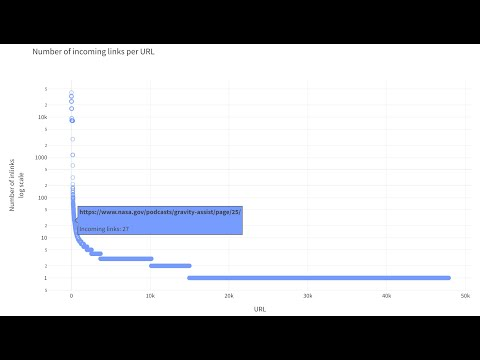

In [1]:
#| code-fold: false
#| echo: false
from IPython.display import YouTubeVideo
YouTubeVideo(id='OCrHuTegGCk', width=560*1.5, height=315*1.5)

In [2]:
import advertools as adv
import adviz
import pandas as pd
import plotly.express as px
import networkx as nx
from IPython.display import display_markdown
pd.options.display.max_columns = None
from dash_bootstrap_templates import load_figure_template
load_figure_template('all')
def md(text):
    return display_markdown(f'{text}', raw=True)

```python
adv.crawl(
    url_list='https://www.nasa.gov/',
    output_file='nasa_crawl.jl',
    follow_links=True,
    custom_settings={
        'CLOSESPIDER_PAGECOUNT': 1000,
        'LOG_FILE': 'nasa_crawl.log',
        'JOBDIR': 'nasa_crawl',
        'AUTOTHROTTLE_ENABLED': True,
        'AUTOTHROTTLE_TARGET_CONCURRENCY': 6
    })

# convert from .jl to .parquet:
adv.crawlytics.jl_to_parquet('nasa_crawl.jl', 'nasa_crawl.parquet')
```

In [3]:
crawldf = pd.read_parquet('nasa_crawl.parquet')
crawldf.head(3)

url  \
0                                         https://www.nasa.gov/   
1                  https://www.nasa.gov/?search=SpaceX%20Crew-2   
2  https://www.nasa.gov/?search=International%20Space%20Station   

                                                    title  \
0                                                    NASA   
1                 3522 Search Results for "SpaceX Crew-2"   
2  28773 Search Results for "International Space Station"   

                                                                                                                 meta_desc  \
0  NASA.gov brings you the latest news, images and videos from America's space agency, pioneering the future in space e...   
1                                                                                                                     None   
2                                                                                                                     None   

                              viewport charset  \
0  width=device-width, initial-scale=1   UTF-8   
1  width=device-width, initial-scale=1   UTF-8   
2  width=device-width, initial-scale=1   UTF-8   

                                                                                                                        h2  \
0  Suggested Searches@@Martians Wanted@@Featured News@@NASA’s SpaceX Crew-8@@Image Of The Day@@Image Of The Day@@Our Ch...   
1                                                               Suggested Searches@@\n\t\t\t\t3522 results found\t\t\t\t\t   
2                                                              Suggested Searches@@\n\t\t\t\t28773 results found\t\t\t\t\t   

                                                                                                                        h3  \
0  News & Events@@Multimedia@@Featured@@Teams Add Iconic NASA ‘Worm’ Logo to Artemis II Rocket, Spacecraft@@Flame Burns...   
1  News & Events@@Multimedia@@Featured@@Teams Add Iconic NASA ‘Worm’ Logo to Artemis II Rocket, Spacecraft@@Flame Burns...   
2  News & Events@@Multimedia@@Featured@@Teams Add Iconic NASA ‘Worm’ Logo to Artemis II Rocket, Spacecraft@@Flame Burns...   

               canonical  \
0  https://www.nasa.gov/   
1                   None   
2                   None   

                                                                                                                  alt_href  \
0  https://www.nasa.gov/feed/@@https://www.nasa.gov/wp-json/wp/v2/pages/128943@@https://www.nasa.gov/wp-json/oembed/1.0...   
1                                                                                               https://www.nasa.gov/feed/   
2                                                                                               https://www.nasa.gov/feed/   

  og:locale  og:type og:title  \
0     en_US  website     NASA   
1     en_US  website     None   
2     en_US  website     None   

                                                                                                            og:description  \
0  NASA.gov brings you the latest news, images and videos from America's space agency, pioneering the future in space e...   
1                                                                                                                     None   
2                                                                                                                     None   

                  og:url og:site_name            og:updated_time  \
0  https://www.nasa.gov/         NASA  2024-02-17T01:14:00-05:00   
1                   None         NASA                       None   
2                   None         NASA                       None   

                                                                            og:image  \
0  https://www.nasa.gov/wp-content/uploads/2018/07/174116main_2006_01777_highres.jpg   
1                                                                               None   
2                                    

In [4]:
md(f'#### Rows: {crawldf.shape[0]:,}. Columns: {crawldf.shape[1]}')

#### Rows: 9,942. Columns: 170

## Get a mapping of all links on the website `adv.crawlytics.links`

In [5]:
#| code-fold: false
link_df = adv.crawlytics.links(crawldf, internal_url_regex=r'nasa\.gov')
link_df

url  \
0                                                  https://www.nasa.gov/   
0                                                  https://www.nasa.gov/   
0                                                  https://www.nasa.gov/   
0                                                  https://www.nasa.gov/   
0                                                  https://www.nasa.gov/   
...                                                                  ...   
9941  https://www.nasa.gov/image-detail/bracing-fuel-efficient-flight-2/   
9941  https://www.nasa.gov/image-detail/bracing-fuel-efficient-flight-2/   
9941  https://www.nasa.gov/image-detail/bracing-fuel-efficient-flight-2/   
9941  https://www.nasa.gov/image-detail/bracing-fuel-efficient-flight-2/   
9941  https://www.nasa.gov/image-detail/bracing-fuel-efficient-flight-2/   

                                                                                    link  \
0                                                                  https://www.nasa.gov/   
0                                                                  https://www.nasa.gov/   
0                                                             https://www.nasa.gov/news/   
0                                                    https://www.nasa.gov/news/all-news/   
0                                                          https://plus.nasa.gov/series/   
...                                                                                  ...   
9941                                                                http://oig.nasa.gov/   
9941                                     https://www.nasa.gov/budgets-plans-and-reports/   
9941  https://www.nasa.gov/organizations/budget-annual-reports/agency-financial-reports/   
9941                                                  https://www.nasa.gov/contact-nasa/   
9941                                                 https://www.nasa.gov/accessibility/   

                                                                   text  \
0                                                    \n\t\t\t\t\n\t\t\t   
0                                                    \n\t\t\t\t\n\t\t\t   
0     \n\t\t\t\t\t\t\t\tNews & Events\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t   
0               \n\t\t\t\t\t\t\t\t\t\tAll NASA News\n\t\t\t\t\t\t\t\t\t   
0       \n\t\t\t\t\t\t\t\t\t\tVideo Series on NASA+\n\t\t\t\t\t\t\t\t\t   
...                                                                 ...   
9941                                                   Office of the IG   
9941                                            Budget & Annual Reports   
9941                                           Agency Financial Reports   
9941                                                       Contact NASA   
9941                                                      Accessibility   

     nofollow  internal  
0       False      True  
0       False      True  
0       False      True  
0       False      True  
0       False      True  
...       ...       ...  
9941    False      True  
9941    False      True  
9941    False      True  
9941    False      True  
9941    False      True  

[1999297 rows x 5 columns]

## Incoming links per page
##### Find the most linked-to pages, exclude them from the table to get the inner links (within article text, product description, etc.)

In [6]:
inlink_counts = link_df['link'].value_counts().reset_index()
inlink_counts

link  \
0                                                                                                       https://plus.nasa.gov/   
1                                                                                                        https://www.nasa.gov/   
2                                                                                                  https://www.nasa.gov/about/   
3                                                                                              https://science.nasa.gov/earth/   
4                                                                                               https://www.nasa.gov/podcasts/   
...                                                                                                                        ...   
47854  https://www.linkedin.com/shareArticle?mini=true&url=https%3A%2F%2Fwww.nasa.gov%2Fimage-detail%2Fp-38-integration-191%2F   
47855                https://www.facebook.com/sharer.php?u=https%3A%2F%2Fwww.nasa.gov%2Fimage-detail%2Fp-38-integration-335%2F   
47856  https://www.pinterest.com/pin-builder/?description=Aaron&media=https%3A%2F%2Fwww.nasa.gov%2Fwp-content%2Fuploads%2F2...   
47857  https://twitter.com/intent/tweet?via=NASA&text=Aaron&url=https%3A%2F%2Fwww.nasa.gov%2Fimage-detail%2Fp-38-integratio...   
47858                                                                                     https://www.nasa.gov/media-tags/sfd/   

       count  
0      40460  
1      33633  
2      32388  
3      32346  
4      32278  
...      ...  
47854      1  
47855      1  
47856      1  
47857      1  
47858      1  

[47859 rows x 2 columns]

In [7]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_scattergl(
    x=list(range(len(inlink_counts))),
    y=inlink_counts['count'],
    text=inlink_counts['link'],
    hovertemplate="<b>%{text}</b><br><br>Incoming links: %{y:,}",
    marker={'opacity': 0.6, 'size': 8, 'symbol': 'circle-open'},
    name='',
    mode='markers')
fig.layout.xaxis.title = 'URL'
fig.layout.yaxis.title = 'Number of inlinks<br>log scale'
fig.layout.template = 'cosmo'
fig.layout.title = 'Number of incoming links per URL'
fig.layout.height = 600
fig.layout.yaxis.type = 'log'
fig

## Cluster pages by inlinks using KMeans clustering

In [8]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(k)
kmeans.fit(inlink_counts[['count']])
sorted(kmeans.cluster_centers_.round(0).flatten())
cluster_df = (inlink_counts
              .groupby(kmeans.labels_)
              ['count']
              .describe()
              .sort_values('mean')
              [['min', 'mean', 'max', 'count']]
              .rename(columns={'mean': 'Avg number of inlinks'})
              .rename_axis('cluster'))



In [9]:
fig = px.bar(
    cluster_df,
    x='Avg number of inlinks',
    y='count',
    log_y=True,
     height=500,
     template='cosmo',
     hover_data=['min', 'max'],
     title=f'<b>Number of Inlinks distribution({k} clusters).</b>', #<br>Points represent the average number of inlinks for a cluster of pages.',
     labels={'mean': 'Average page size (bytes)',
             'count': "Number of pages in cluster<br>log scale"})
fig.data[0].hovertemplate = '<b>Average number of inlinks: %{x:,.0f}</b><br><br>Number of pages in cluster: %{y:,.0f}<br><br>min: %{customdata[0]:,.0f}<br>max: %{customdata[1]:,.0f}<extra></extra>'
fig.layout.font.size = 14
fig.layout.xaxis.tickvals = cluster_df['Avg number of inlinks'].round()
fig.show()

In [10]:
display(cluster_df.style.format('{:,.0f}').background_gradient(cmap='cividis').set_caption(f'<h3>Inink cluster details ({k} clusters)</h4>'))



In [11]:
#| echo: true
#| code-fold: false
top_links = inlink_counts[inlink_counts['count'].gt(200)]['link']
contextual_links = link_df[~link_df['link'].isin(top_links)]

## Example 1

[https://www.nasa.gov/image-detail/bracing-fuel-efficient-flight-2/](https://www.nasa.gov/image-detail/bracing-fuel-efficient-flight-2/)

In [12]:
contextual_links.loc[9941, :]

url  \
9941  https://www.nasa.gov/image-detail/bracing-fuel-efficient-flight-2/   
9941  https://www.nasa.gov/image-detail/bracing-fuel-efficient-flight-2/   
9941  https://www.nasa.gov/image-detail/bracing-fuel-efficient-flight-2/   
9941  https://www.nasa.gov/image-detail/bracing-fuel-efficient-flight-2/   
9941  https://www.nasa.gov/image-detail/bracing-fuel-efficient-flight-2/   
9941  https://www.nasa.gov/image-detail/bracing-fuel-efficient-flight-2/   
9941  https://www.nasa.gov/image-detail/bracing-fuel-efficient-flight-2/   
9941  https://www.nasa.gov/image-detail/bracing-fuel-efficient-flight-2/   
9941  https://www.nasa.gov/image-detail/bracing-fuel-efficient-flight-2/   
9941  https://www.nasa.gov/image-detail/bracing-fuel-efficient-flight-2/   
9941  https://www.nasa.gov/image-detail/bracing-fuel-efficient-flight-2/   
9941  https://www.nasa.gov/image-detail/bracing-fuel-efficient-flight-2/   

                                                                                                                         link  \
9941                                                       https://www.nasa.gov/image-detail/bracing-fuel-efficient-flight-2/   
9941                                                       https://www.nasa.gov/image-detail/bracing-fuel-efficient-flight-2/   
9941                                                        https://www.nasa.gov/image-article/bracing-fuel-efficient-flight/   
9941     https://www.facebook.com/sharer.php?u=https%3A%2F%2Fwww.nasa.gov%2Fimage-detail%2Fbracing-fuel-efficient-flight-2%2F   
9941  https://www.pinterest.com/pin-builder/?description=Bracing%20for%20Fuel-Efficient%20Flight&media=https%3A%2F%2Fwww.n...   
9941  https://twitter.com/intent/tweet?via=NASA&text=Bracing%20for%20Fuel-Efficient%20Flight&url=https%3A%2F%2Fwww.nasa.go...   
9941  https://www.linkedin.com/shareArticle?mini=true&url=https%3A%2F%2Fwww.nasa.gov%2Fimage-detail%2Fbracing-fuel-efficie...   
9941                                                                                    https://www.nasa.gov/media-tags/aatt/   
9941                                                                                    https://www.nasa.gov/media-tags/aavp/   
9941                                                                             https://www.nasa.gov/media-tags/aeronautics/   
9941                                                                                    https://www.nasa.gov/media-tags/iasp/   
9941                                                                                     https://www.nasa.gov/media-tags/sfd/   

                                                 text nofollow  internal  
9941  \n\t\t\t\t\tNews & Events\n\t\t\t\t\t\n\t\t\t\t    False      True  
9941     \n\t\t\t\t\tMultimedia\n\t\t\t\t\t\n\t\t\t\t    False      True  
9941                                        Read More    False      True  
9941                         \n\t\t\tFacebook\n\t\t\t     True      True  
9941                        \n\t\t\tPinterest\n\t\t\t     True      True  
9941                                \n\t\t\tX\n\t\t\t     True      True  
9941                         \n\t\t\tLinkedIn\n\t\t\t     True      True  
9941                Advanced Air Transport Technology    False      True  
9941                    Advanced Air Vehicles Program    False      True  
9941                                      Aeronautics    False      True  
9941              Integrated Aviation Systems Program    False      True  
9941                  Sustainable Flight Demonstrator    False      True

## Example 2

[https://www.nasa.gov/missions/icon/nasas-icon-explores-the-boundary-between-earth-and-space/](https://www.nasa.gov/missions/icon/nasas-icon-explores-the-boundary-between-earth-and-space/)

In [13]:
contextual_links.loc[9938, :]

url  \
9938  https://www.nasa.gov/missions/icon/nasas-icon-explores-the-boundary-between-earth-and-space/   
9938  https://www.nasa.gov/missions/icon/nasas-icon-explores-the-boundary-between-earth-and-space/   
9938  https://www.nasa.gov/missions/icon/nasas-icon-explores-the-boundary-between-earth-and-space/   
9938  https://www.nasa.gov/missions/icon/nasas-icon-explores-the-boundary-between-earth-and-space/   
9938  https://www.nasa.gov/missions/icon/nasas-icon-explores-the-boundary-between-earth-and-space/   
9938  https://www.nasa.gov/missions/icon/nasas-icon-explores-the-boundary-between-earth-and-space/   
9938  https://www.nasa.gov/missions/icon/nasas-icon-explores-the-boundary-between-earth-and-space/   
9938  https://www.nasa.gov/missions/icon/nasas-icon-explores-the-boundary-between-earth-and-space/   
9938  https://www.nasa.gov/missions/icon/nasas-icon-explores-the-boundary-between-earth-and-space/   
9938  https://www.nasa.gov/missions/icon/nasas-icon-explores-the-boundary-between-earth-and-space/   
9938  https://www.nasa.gov/missions/icon/nasas-icon-explores-the-boundary-between-earth-and-space/   

                                                                                                                         link  \
9938                             https://www.nasa.gov/missions/icon/nasas-icon-explores-the-boundary-between-earth-and-space/   
9938                             https://www.nasa.gov/missions/icon/nasas-icon-explores-the-boundary-between-earth-and-space/   
9938  https://x.com/intent/tweet?via=NASA&text=NASA%E2%80%99s%20ICON%20Explores%20the%20Boundary%20Between%20Earth%20and%2...   
9938  https://www.facebook.com/sharer.php?u=https%3A%2F%2Fwww.nasa.gov%2Fmissions%2Ficon%2Fnasas-icon-explores-the-boundar...   
9938  https://www.linkedin.com/shareArticle?mini=true&url=https%3A%2F%2Fwww.nasa.gov%2Fmissions%2Ficon%2Fnasas-icon-explor...   
9938                                                                                          https://svs.gsfc.nasa.gov/12699   
9938                                                                                            https://www.nasa.gov/nasalive   
9938                                                             https://www.nasa.gov/content/icon-spacecraft-and-instruments   
9938                                                                                                https://www.nasa.gov/icon   
9938                                                                                            http://icon.ssl.berkeley.edu/   
9938                                                                                             https://www.nasa.gov/goddard   

                                                                                                             text  \
9938                                                              \n\t\t\t\t\tNews & Events\n\t\t\t\t\t\n\t\t\t\t   
9938                                                                 \n\t\t\t\t\tMultimedia\n\t\t\t\t\t\n\t\t\t\t   
9938                                                                                           \n\t\t\t\t\n\t\t\t   
9938                                                                                           \n\t\t\t\t\n\t\t\t   
9938                                                                                           \n\t\t\t\t\n\t\t\t   
9938  Download this video in HD formats from NASA’s Goddard Space Flight Center’s Scientific Visualization Studio   
9938                                                                                                      NASA TV   
9938                                                                                            MIGHTI instrument   
9938                                                                                          NASA’s ICON website   
9938                                                                                  UC Berkeley’s ICON website    
9938                              

## Example 3

[https://www.nasa.gov/history/50-years-ago-nasa-names-apollo-16-crew/](https://www.nasa.gov/history/50-years-ago-nasa-names-apollo-16-crew/)

In [14]:
contextual_links.loc[1465, :]

url  \
1465  https://www.nasa.gov/history/50-years-ago-nasa-names-apollo-16-crew/   
1465  https://www.nasa.gov/history/50-years-ago-nasa-names-apollo-16-crew/   
1465  https://www.nasa.gov/history/50-years-ago-nasa-names-apollo-16-crew/   
1465  https://www.nasa.gov/history/50-years-ago-nasa-names-apollo-16-crew/   
1465  https://www.nasa.gov/history/50-years-ago-nasa-names-apollo-16-crew/   
1465  https://www.nasa.gov/history/50-years-ago-nasa-names-apollo-16-crew/   
1465  https://www.nasa.gov/history/50-years-ago-nasa-names-apollo-16-crew/   
1465  https://www.nasa.gov/history/50-years-ago-nasa-names-apollo-16-crew/   
1465  https://www.nasa.gov/history/50-years-ago-nasa-names-apollo-16-crew/   
1465  https://www.nasa.gov/history/50-years-ago-nasa-names-apollo-16-crew/   
1465  https://www.nasa.gov/history/50-years-ago-nasa-names-apollo-16-crew/   
1465  https://www.nasa.gov/history/50-years-ago-nasa-names-apollo-16-crew/   
1465  https://www.nasa.gov/history/50-years-ago-nasa-names-apollo-16-crew/   
1465  https://www.nasa.gov/history/50-years-ago-nasa-names-apollo-16-crew/   
1465  https://www.nasa.gov/history/50-years-ago-nasa-names-apollo-16-crew/   
1465  https://www.nasa.gov/history/50-years-ago-nasa-names-apollo-16-crew/   
1465  https://www.nasa.gov/history/50-years-ago-nasa-names-apollo-16-crew/   
1465  https://www.nasa.gov/history/50-years-ago-nasa-names-apollo-16-crew/   
1465  https://www.nasa.gov/history/50-years-ago-nasa-names-apollo-16-crew/   

                                                                                                                         link  \
1465                                                     https://www.nasa.gov/history/50-years-ago-nasa-names-apollo-16-crew/   
1465                                                     https://www.nasa.gov/history/50-years-ago-nasa-names-apollo-16-crew/   
1465  https://x.com/intent/tweet?via=NASA&text=50%20Years%20Ago%3A%20NASA%20Names%20Apollo%2016%20Crew&url=https%3A%2F%2Fw...   
1465   https://www.facebook.com/sharer.php?u=https%3A%2F%2Fwww.nasa.gov%2Fhistory%2F50-years-ago-nasa-names-apollo-16-crew%2F   
1465  https://www.linkedin.com/shareArticle?mini=true&url=https%3A%2F%2Fwww.nasa.gov%2Fhistory%2F50-years-ago-nasa-names-a...   
1465               https://historycollection.jsc.nasa.gov/JSCHistoryPortal/history/oral_histories/MattinglyTK/mattinglytk.htm   
1465            https://www.nasa.gov/historycollection.jsc.nasa.gov/JSCHistoryPortal/history/oral_histories/DukeCM/dukecm.htm   
1465                           https://www.nasa.gov/history/50-years-ago-apollo-10-clears-the-way-for-the-first-moon-landing/   
1465                                                  https://www.nasa.gov/history/50-years-ago-apollo-13-and-german-measles/   
1465                                                 https://www.nasa.gov/history/50-years-ago-one-small-step-one-giant-leap/   
1465                       https://historycollection.jsc.nasa.gov/JSCHistoryPortal/history/oral_histories/HaiseFW/haisefw.htm   
1465                 https://historycollection.jsc.nasa.gov/JSCHistoryPortal/history/oral_histories/MitchellED/mitchelled.htm   
1465                                                    https://www.nasa.gov/history/50-years-ago-houston-weve-had-a-problem/   
1465                                             https://www.nasa.gov/history/50-years-ago-apollo-14-splashdown-and-recovery/   
1465                       https://historycollection.jsc.nasa.gov/JSCHistoryPortal/history/oral_histories/PogueWR/poguewr.htm   
1465                         https://historycollection.jsc.nasa.gov/JSCHistoryPortal/history/oral_histories/CarrGP/carrgp.htm   
1465                                          https://www.nasa.gov/history/50-years-ago-preparations-for-apollo-14-15-and-16/   
1465                                                        https://www.nasa.gov/history/skylab-americas-first-space-station/   
1465                                     https://www.nasa.g